In [12]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepathstrain = []
imagepathstest = []

import os
for dirname, _, filenames in os.walk(r'images\4.2.3\TrainingDataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepathstrain.append(path)
        
for dirname, _, filenames in os.walk(r'images\4.2.3\TestingDataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepathstest.append(path)

print(len(imagepathstrain))

1497


In [13]:
IMG_SIZE=128
Xtrain=[]
ytrain=[]
for image in imagepathstrain:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        Xtrain.append(np.array(img))
        if(image.startswith('images\\4.2.3\\TrainingDataset\\meme\\')):
            ytrain.append('meme')
        else:
            ytrain.append('non-meme')
    except:
        pass
    
Xtest=[]
ytest=[]
for image in imagepathstest:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        Xtest.append(np.array(img))
        if(image.startswith('images\\4.2.3\\TestingDataset\\meme\\')):
            ytest.append('meme')
        else:
            ytest.append('non-meme')
    except:
        pass
    

len(Xtrain)


1497

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Ytrain=le.fit_transform(ytrain)
Ytrain=to_categorical(Ytrain,2)

Ytest=le.fit_transform(ytest)
Ytest=to_categorical(Ytest,2)

Xtrain=np.array(Xtrain)

Xtest=np.array(Xtest)

#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [15]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.6))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [16]:
#Model configuration for training purpose
adam= keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

In [18]:
history=model.fit(Xtrain, Ytrain, epochs=50, batch_size=12, verbose=2, 
         validation_data=(Xtest, Ytest))

Epoch 1/50
125/125 - 128s - loss: 1.7238 - accuracy: 0.6132 - val_loss: 0.5811 - val_accuracy: 0.7143
Epoch 2/50
125/125 - 146s - loss: 0.5564 - accuracy: 0.7361 - val_loss: 0.6583 - val_accuracy: 0.6286
Epoch 3/50
125/125 - 149s - loss: 0.4921 - accuracy: 0.7916 - val_loss: 0.4304 - val_accuracy: 0.8095
Epoch 4/50
125/125 - 148s - loss: 0.4305 - accuracy: 0.8270 - val_loss: 0.4406 - val_accuracy: 0.8095
Epoch 5/50
125/125 - 149s - loss: 0.4194 - accuracy: 0.8250 - val_loss: 0.4210 - val_accuracy: 0.7714
Epoch 6/50
125/125 - 150s - loss: 0.3741 - accuracy: 0.8537 - val_loss: 0.3891 - val_accuracy: 0.8381
Epoch 7/50
125/125 - 259s - loss: 0.3538 - accuracy: 0.8631 - val_loss: 0.4214 - val_accuracy: 0.8095
Epoch 8/50
125/125 - 258s - loss: 0.3202 - accuracy: 0.8737 - val_loss: 0.3777 - val_accuracy: 0.8571
Epoch 9/50
125/125 - 259s - loss: 0.3006 - accuracy: 0.8818 - val_loss: 0.3784 - val_accuracy: 0.8381
Epoch 10/50
125/125 - 281s - loss: 0.2880 - accuracy: 0.8744 - val_loss: 0.3499 - 

In [19]:
loss, accuracy = model.evaluate(Xtest, Ytest)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))


4/4 [==============================] - 2s 610ms/step - loss: 0.4318 - accuracy: 0.8286
Test accuracy: 82.86%


<AxesSubplot:>

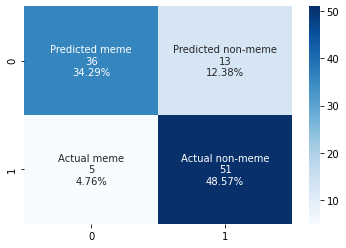

In [20]:
# Making predictions on test data
prediction = model.predict(Xtest)
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)
y_test1=Ytest.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical

#Create a Confusion Matrix for Evaluation
cf_matrix = confusion_matrix(y_test2, y_pred)

import seaborn as sns
group_names = ['Predicted meme','Predicted non-meme','Actual meme','Actual non-meme']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [21]:
from sklearn.metrics import classification_report

#y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        49
           1       0.80      0.91      0.85        56

    accuracy                           0.83       105
   macro avg       0.84      0.82      0.82       105
weighted avg       0.83      0.83      0.83       105



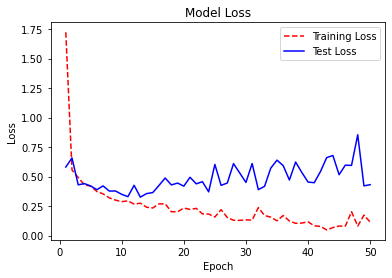

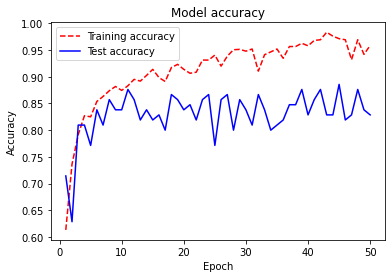

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_count = range(1, len(training_acc) + 1)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()